Enlace al drive para ver los resultados de kaggle: https://drive.google.com/drive/folders/180ErAOjTkA7E9VYWWRRwoVuwDt81jO5a?usp=drive_link

# Cargo mi set encodeado

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
train_set = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/TP2/Perceptron(Baseline)/set_train_perceptron_encoded.parq')

In [ ]:
train_set

,attack_time,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type_0,attack_type_1,attack_type_2,attack_type_3,watcher_uuid_enum,label
2746887,14.416667,0.019842,0.019842,0.019842,0.019842,0,0,0,1,18401,0
2746888,14.416667,0.009921,0.009921,0.009921,0.009921,0,0,1,0,18401,0
3704781,14.650000,0.019842,0.019842,0.006614,0.006614,0,0,0,1,48687,0
3704782,14.650000,0.009921,0.009921,0.004961,0.004961,0,0,1,0,48687,0
3535768,14.766666,0.006614,0.019842,0.003968,0.003968,0,0,0,1,2838,0
...,...,...,...,...,...,...,...,...,...,...,...
39784810,12.183333,0.018326,0.017764,0.001745,0.044905,0,0,0,1,6356,0
39784811,12.183333,0.018326,0.017764,0.001745,0.044905,0,1,0,0,6356,0
39784845,12.183333,0.018290,0.014697,0.001745,0.044905,0,1,0,0,36662,0
39784846,12.183333,0.018290,0.014697,0.001745,0.044904,0,0,0,1,36662,0


Debido a que el perceptron es un modelo que trata de establecer una linea para predecir la forma de cada variable, resultó dificil obtener una buena perdiccion con el data_set entero debido a la gran desprorporcion entre 0 y 1 del label por lo que se optó por realizar un undersampling para equilibrar esta cuestion. No se pudo hacer un oversampling debido a que esto provocaba que se saturara la RAM.

In [ ]:
from sklearn.utils import resample

clase_mayoritaria = train_set[train_set['label'] == 0]
clase_minoritaria = train_set[train_set['label'] == 1]
clase_mayoritaria_undersampled = resample(clase_mayoritaria, replace=False, n_samples=len(clase_minoritaria), random_state=50)

train_set = pd.concat([clase_mayoritaria_undersampled, clase_minoritaria])

In [ ]:
X_train, y_train = train_set.iloc[:,:-1],train_set.iloc[:,-1]

In [ ]:
test_set = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/TP2/Perceptron(Baseline)/set_validation_perceptron_encoded.parq')

In [ ]:
X_test, y_test = test_set.iloc[:,:-1],test_set.iloc[:,-1]

# Normalizacion de datos

Como un perceptron es una red neuronal (con una sola neurona), necesito normalizar los datos que se encuentran desproporcionados respecto a los demas

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

column_to_scale = ['attack_time', 'watcher_uuid_enum']

X_train[column_to_scale] = scaler.fit_transform(X_train[column_to_scale])
X_test[column_to_scale] = scaler.transform(X_test[column_to_scale])

In [ ]:
del test_set
del train_set

#Busqueda de hiperparametros

In [ ]:
param_dist = {
    'alpha': [0.01, 0.001],
    'max_iter': [100, 200],
    'tol': [0.001, 0.0001],
    'n_iter_no_change': [50, 100],
    'eta0': [0.1, 0.5]
}

In [ ]:
model = Perceptron()

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='f1', n_iter=10, cv=3, random_state=10, verbose=2)

random_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END alpha=0.001, eta0=0.1, max_iter=200, n_iter_no_change=50, tol=0.001; total time=   9.3s
[CV] END alpha=0.001, eta0=0.1, max_iter=200, n_iter_no_change=50, tol=0.001; total time=   9.2s
[CV] END alpha=0.001, eta0=0.1, max_iter=200, n_iter_no_change=50, tol=0.001; total time=   8.2s
[CV] END alpha=0.01, eta0=0.1, max_iter=200, n_iter_no_change=100, tol=0.0001; total time=  18.8s
[CV] END alpha=0.01, eta0=0.1, max_iter=200, n_iter_no_change=100, tol=0.0001; total time=  20.9s
[CV] END alpha=0.01, eta0=0.1, max_iter=200, n_iter_no_change=100, tol=0.0001; total time=  19.3s
[CV] END alpha=0.01, eta0=0.1, max_iter=200, n_iter_no_change=50, tol=0.0001; total time=  10.3s
[CV] END alpha=0.01, eta0=0.1, max_iter=200, n_iter_no_change=50, tol=0.0001; total time=   9.5s
[CV] END alpha=0.01, eta0=0.1, max_iter=200, n_iter_no_change=50, tol=0.0001; total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=0.01, eta0=0.1, max_iter=100, n_iter_no_change=100, tol=0.001; total time=  17.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=0.01, eta0=0.1, max_iter=100, n_iter_no_change=100, tol=0.001; total time=  19.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=0.01, eta0=0.1, max_iter=100, n_iter_no_change=100, tol=0.001; total time=  17.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=0.01, eta0=0.1, max_iter=100, n_iter_no_change=100, tol=0.0001; total time=  20.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=0.01, eta0=0.1, max_iter=100, n_iter_no_change=100, tol=0.0001; total time=  19.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END alpha=0.01, eta0=0.1, max_iter=100, n_iter_no_change=100, tol=0.0001; total time=  18.5s
[CV] END alpha=0.001, eta0=0.1, max_iter=200, n_iter_no_change=50, tol=0.0001; total time=  10.5s
[CV] END alpha=0.001, eta0=0.1, max_iter=200, n_iter_no_change=50, tol=0.0001; total time=   8.0s
[CV] END alpha=0.001, eta0=0.1, max_iter=200, n_iter_no_change=50, tol=0.0001; total time=  10.0s
[CV] END alpha=0.01, eta0=0.5, max_iter=200, n_iter_no_change=50, tol=0.0001; total time=  14.2s
[CV] END alpha=0.01, eta0=0.5, max_iter=200, n_iter_no_change=50, tol=0.0001; total time=   9.7s
[CV] END alpha=0.01, eta0=0.5, max_iter=200, n_iter_no_change=50, tol=0.0001; total time=  15.4s
[CV] END alpha=0.001, eta0=0.5, max_iter=200, n_iter_no_change=50, tol=0.001; total time=   9.1s
[CV] END alpha=0.001, eta0=0.5, max_iter=200, n_iter_no_change=50, tol=0.001; total time=  10.8s
[CV] END alpha=0.001, eta0=0.5, max_iter=200, n_iter_no_change=50, tol=0.001; total time=  10.1s
[CV] END alpha=0.01, eta0=

Mejores hiperparámetros: {'tol': 0.001, 'n_iter_no_change': 50, 'max_iter': 200, 'eta0': 0.1, 'alpha': 0.001}

#ENTRENAMIENTO del preceptron

In [ ]:
hiperparametros = {'tol': 0.001, 'n_iter_no_change': 50, 'max_iter': 200, 'eta0': 0.1, 'alpha': 0.001}

In [ ]:
from sklearn.linear_model import Perceptron
model = Perceptron(**hiperparametros).fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99  13821374
           1       0.41      0.22      0.29    193042

    accuracy                           0.98  14014416
   macro avg       0.70      0.61      0.64  14014416
weighted avg       0.98      0.98      0.98  14014416



RESULTADO KAGGLE:

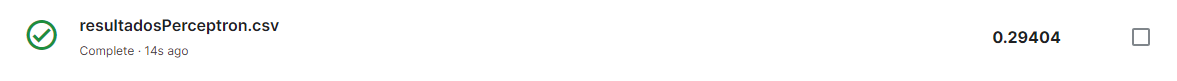

#Features mas importantes y demas

In [ ]:
coeficientes = model.coef_[0]
nombres_columnas = X_train.columns

In [ ]:
coeficientes_df = pd.DataFrame({'Característica': nombres_columnas, 'Importancia': coeficientes})

Los niveles mas altos de importancia implican que esa feature tiene un impacto más significativo en las predicciones.

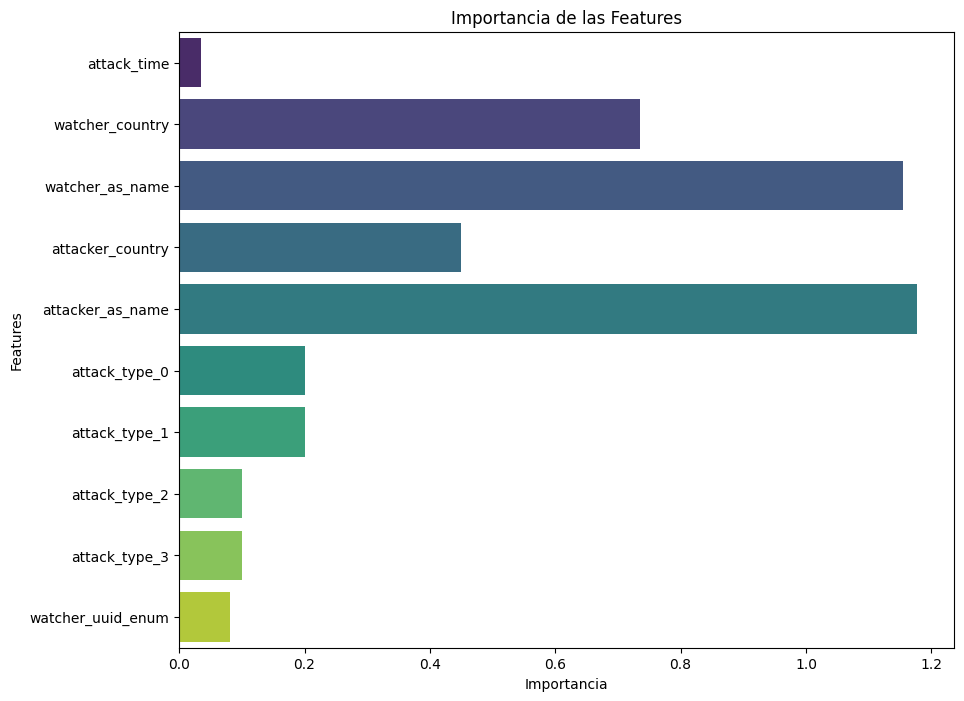

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
coeficientes_df['Importancia_abs'] = coeficientes_df['Importancia'].abs()

# Establece el rango del eje y manualmente
y_range = (0, coeficientes_df['Importancia_abs'].max() * 1.2)
plt.ylim(y_range)

sns.barplot(x='Importancia_abs', y='Característica', data=coeficientes_df, palette='viridis')

plt.title('Importancia de las Features')
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.show()

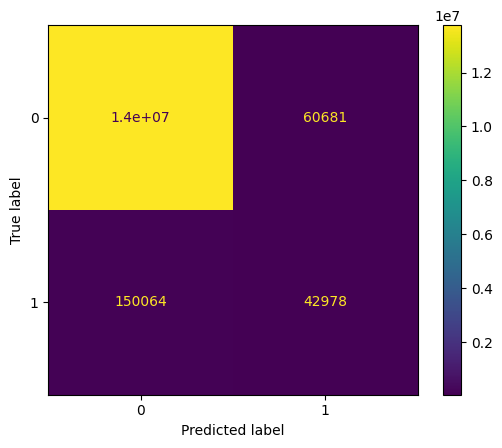

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#Validacion contra KAGGLE



In [ ]:
del X_train
del X_test
del y_train
del y_test

In [ ]:
kaggle_set = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/TP2/Perceptron(Baseline)/test_kaggle_perceptron_encoded.parq')

In [ ]:
kaggle_set

,attack_time,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type_0,attack_type_1,attack_type_2,attack_type_3,watcher_uuid_enum,attacker_ip_enum
0,7.283333,0.021330,0.022318,0.010713,1.646918e-02,0,0,0,1,1,7696
1,7.283333,0.021330,0.022318,0.010713,1.646918e-02,0,1,0,0,1,7696
2,7.283333,0.021330,0.022318,0.010713,1.646918e-02,0,0,1,1,1,7696
3,7.283333,0.021330,0.022318,0.010713,1.646918e-02,0,0,1,1,1,7696
4,7.283333,0.021330,0.032953,0.024376,3.773450e-02,0,0,1,1,3,7543
...,...,...,...,...,...,...,...,...,...,...,...
18682292,21.233334,0.016079,0.006755,0.015448,9.963406e-08,0,0,1,0,24879,198081
18682293,21.233334,0.016079,0.006755,0.015448,9.963406e-08,0,0,1,0,24879,198081
18682294,21.233334,0.016079,0.006755,0.015448,9.963406e-08,0,0,1,0,24879,198081
18682295,21.233334,0.016079,0.006755,0.015448,9.963406e-08,0,0,1,0,24879,198081


In [ ]:
X_test_kaggle, y_test_kaggle = kaggle_set.iloc[:,:-1],kaggle_set.iloc[:,-1]

In [ ]:
del kaggle_set

Normalizacion de datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

column_to_scale = ['attack_time','watcher_uuid_enum']
X_test_kaggle[column_to_scale] = scaler.transform(X_test_kaggle[column_to_scale])

Predicciones

In [ ]:
y_pred_kaggle = model.predict(X_test_kaggle)
y_pred_kaggle = pd.Series(y_pred_kaggle, name='label')

In [ ]:
RESULTADOS_KAGGLE = pd.concat([y_test_kaggle, y_pred_kaggle], axis=1)

In [ ]:
RESULTADOS_KAGGLE = RESULTADOS_KAGGLE.drop_duplicates(subset='attacker_ip_enum').reset_index(drop=True)
RESULTADOS_KAGGLE

,attacker_ip_enum,label
0,7696,0
1,7543,0
2,7280,0
3,1538,0
4,285,0
...,...,...
49415,196304,0
49416,199918,0
49417,192446,0
49418,192056,0


In [ ]:
RESULTADOS_KAGGLE.to_csv('/content/drive/MyDrive/Colab Notebooks/TP2/Perceptron(Baseline)/resultadosPerceptron.csv', index=False)